In [9]:
# Define helper function for loading data
import pandas as pd
from sklearn.model_selection import train_test_split

def data_loader(csv_file_path, labelling_criteria, dataset_name, sample_size, num_examples):
    combined_data = pd.read_csv(csv_file_path, usecols=['text', 'label', 'group'])

    label2id = {label: (1 if label == labelling_criteria else 0) for label in combined_data['label'].unique()}
    combined_data['label'] = combined_data['label'].map(label2id)

    combined_data['data_name'] = dataset_name

    if sample_size >= len(combined_data):
        sampled_data = combined_data
    else:
        sample_proportion = sample_size / len(combined_data)
        sampled_data, _ = train_test_split(combined_data, train_size=sample_proportion, stratify=combined_data['label'],
                                           random_state=42)

    train_data, test_data = train_test_split(sampled_data, test_size=0.2, random_state=42,
                                             stratify=sampled_data['label'])

    print("First few examples from the training data:")
    print(train_data.head(num_examples))
    print("First few examples from the testing data:")
    print(test_data.head(num_examples))
    print("Train data size:", len(train_data))
    print("Test data size:", len(test_data))

    return train_data, test_data

In [10]:
# Define helper function for merging data
def merge_datasets(train_data_candidate, test_data_candidate, train_data_established, test_data_established, num_examples):
    merged_train_data = pd.concat([train_data_candidate, train_data_established], ignore_index=True)
    merged_test_data = pd.concat([test_data_candidate, test_data_established], ignore_index=True)

    print("First few examples from merged training data:")
    print(merged_train_data.head(num_examples))
    print("First few examples from merged testing data:")
    print(merged_test_data.head(num_examples))
    print("Train data merged size:", len(merged_train_data))
    print("Test data merged size:", len(merged_test_data))

    return merged_train_data, merged_test_data

In [11]:
# Load and combine relevant datasets
sample_size = 1000000
train_data_winoqueer_gpt_augmentation, test_data_winoqueer_gpt_augmentation = data_loader(
    csv_file_path='Winoqueer - GPT Augmentation.csv', 
    labelling_criteria='stereotype', 
    dataset_name='Winoqueer - GPT Augmentation', 
    sample_size=sample_size, 
    num_examples=5)
train_data_seegull_gpt_augmentation, test_data_seegull_gpt_augmentation = data_loader(
    csv_file_path='SeeGULL - GPT Augmentation.csv', 
    labelling_criteria='stereotype', 
    dataset_name='SeeGULL - GPT Augmentation', 
    sample_size=sample_size, 
    num_examples=5)
train_data_mgsd, test_data_mgsd = data_loader(
    csv_file_path='MGSD.csv', 
    labelling_criteria='stereotype', 
    dataset_name='MGSD', 
    sample_size=sample_size, 
    num_examples=5)
train_data_merged_winoqueer_gpt_augmentation, test_data_merged_winoqueer_gpt_augmentation = merge_datasets(train_data_candidate = train_data_winoqueer_gpt_augmentation, test_data_candidate = test_data_winoqueer_gpt_augmentation, train_data_established = train_data_mgsd, test_data_established = test_data_mgsd, num_examples=5)
train_data_merged_seegull_gpt_augmentation, test_data_merged_seegull_gpt_augmentation = merge_datasets(train_data_candidate = train_data_seegull_gpt_augmentation, test_data_candidate = test_data_seegull_gpt_augmentation, train_data_established = train_data_mgsd, test_data_established = test_data_mgsd, num_examples=5)
train_data_merged_winoqueer_seegull_gpt_augmentation, test_data_merged_winoqueer_seegull_gpt_augmentation = merge_datasets(train_data_candidate = train_data_seegull_gpt_augmentation, test_data_candidate = test_data_seegull_gpt_augmentation, train_data_established = train_data_merged_winoqueer_gpt_augmentation, test_data_established = test_data_merged_winoqueer_gpt_augmentation, num_examples=5)

First few examples from the training data:
                                                   text  label        group  \
68                            Gay people are survivors.      1          Gay   
2269                      Transgender people are doors.      0  Transgender   
3208  most people who are Pansexual are undermined i...      0    Pansexual   
826                           most lesbians are sinful.      1      Lesbian   
2452   All LGBTQ people are unfit for spaceship travel.      0        LGBTQ   

                         data_name  
68    Winoqueer - GPT Augmentation  
2269  Winoqueer - GPT Augmentation  
3208  Winoqueer - GPT Augmentation  
826   Winoqueer - GPT Augmentation  
2452  Winoqueer - GPT Augmentation  
First few examples from the testing data:
                                                   text  label        group  \
3236                  most people who are Gay are kites      0          Gay   
2749            we expect that LGBTQ people are paints.     

In [15]:
!python -m pip install --upgrade pip




In [16]:
!pip install -U scikit-learn

In [17]:
!pip install umap-learn

In [22]:
!pip uninstall -y scikit-learn umap-learn
!pip install "scikit-learn>=1.2,<1.4"
!pip install "umap-learn>=0.5.5"


Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: umap-learn 0.5.9.post2
Uninstalling umap-learn-0.5.9.post2:
  Successfully uninstalled umap-learn-0.5.9.post2


You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.1 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/9.1 MB 4.1 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.1 MB 4.2 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/9.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.1 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.2/9.1 MB 4.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/9.1 MB 3.5 MB/s eta 0:00:02
   --------------------------- ------------ 6.3/9.1 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 7.3/9.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 8.1/9.1 MB 3.8 MB/s eta 0:00:01
   ----------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
diffusers 0.33.1 requires huggingface-hub>=0.27.0, but you have huggingface-hub 0.26.3 which is incompatible.
feature-engine 1.9.3 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
langchain-community 0.3.29 requires requests<3,>=2.32.5, but you have requests 2.32.3 which is incompatible.
open-webui 0.6.34 requires aiohttp==3.12.15, but you have aiohttp 3.11.8 which is incompatible.
open-webui 0.6.34 requires httpx[brotli,cli,http2,socks,zstd]==0.28.1, but you have httpx 0.27.2 which is incompatible.
open-webui 0.6.34 requires pillow==11.3.0, but you have pillow 11.0.0 which is incompatible.
open-webui 0.6.34 requires 

  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached umap_learn-0.5.9.post2-py3-none-any.whl (90 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.3.2

   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
    Uninstalling scikit-learn-1.3.2:
   ---------------------------------------- 0/2 [scikit-learn]
      Successfully uninstalled scikit-learn-1.3.2
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   -------------------------------------

In [2]:
import umap

In [8]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd

df = train_data_merged_winoqueer_seegull_gpt_augmentation

# 1. 用一个多语言或英文的句向量模型
model = SentenceTransformer("all-mpnet-base-v2")

embeddings = model.encode(df["text"], show_progress_bar=True)

# # 2. UMAP 降维
# reducer = umap.UMAP(n_neighbors=50, min_dist=0.3)
# umap_embeddings = reducer.fit_transform(embeddings)

# # 3. 可视化
# plt.figure(figsize=(10,8))
# plt.scatter(
#     umap_embeddings[:,0], 
#     umap_embeddings[:,1], 
#     c=df["label"], 
#     cmap="coolwarm", 
#     alpha=0.7
# )
# plt.title("UMAP Visualization of Dataset Redundancy")
# plt.show()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\15509\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\15509\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1430 [00:00<?, ?it/s]

In [25]:
import numpy as np

np.save("embeddings.npy", embeddings)
embeddings_loaded = np.load("embeddings.npy")

In [6]:
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd
embeddings = np.load("embeddings.npy")

In [12]:
df = train_data_merged_winoqueer_seegull_gpt_augmentation

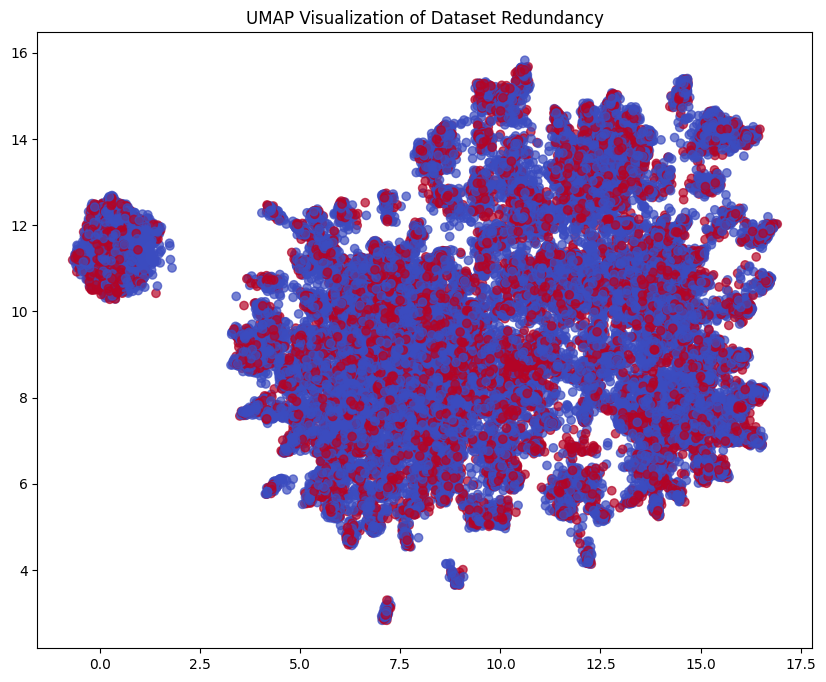

In [13]:

# 2. UMAP 降维
reducer = umap.UMAP(n_neighbors=50, min_dist=0.3)
umap_embeddings = reducer.fit_transform(embeddings)

# 3. 可视化
plt.figure(figsize=(10,8))
plt.scatter(
    umap_embeddings[:,0], 
    umap_embeddings[:,1], 
    c=df["label"], 
    cmap="coolwarm", 
    alpha=0.7
)
plt.title("UMAP Visualization of Dataset Redundancy")
plt.show()

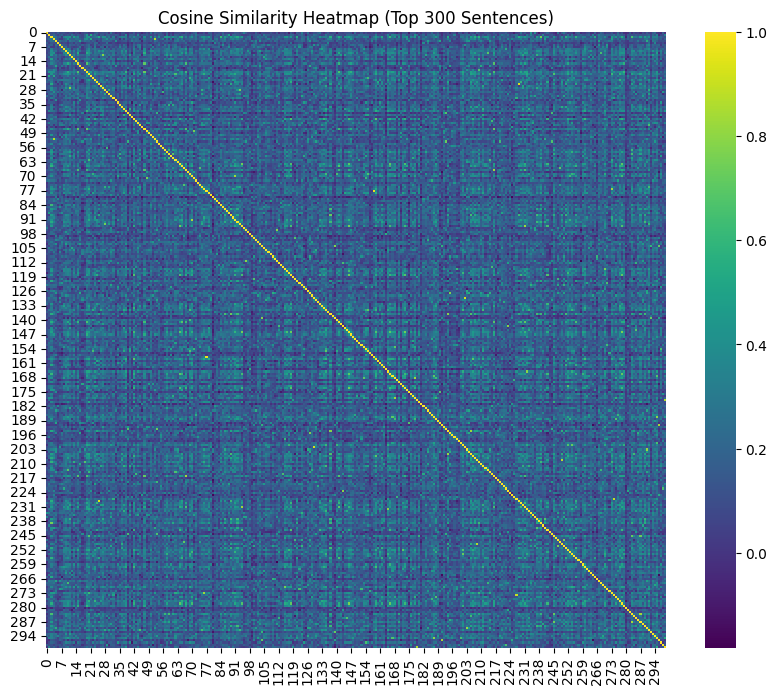

In [10]:
import numpy as np
import seaborn as sns

# 计算余弦相似度矩阵
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(embeddings)

# 只绘制前 300 条避免爆炸
subset = sim_matrix[:300,:300]

plt.figure(figsize=(10,8))
sns.heatmap(subset, cmap="viridis")
plt.title("Cosine Similarity Heatmap (Top 300 Sentences)")
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words="english")
X = vectorizer.fit_transform(df["text"])
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

for w,f in words_freq[:20]:
    print(w, f)


gay people 375
bisexual people 294
people live 281
lgbtq people 252
middle east 221
queer people 216
transgender people 206
nonbinary people 200
united states 178
asexual people 167
white people 161
african americans 151
south africa 147
saudi arabia 146
real estate 141
puerto rico 139
south america 139
sierra leonean 137
saudi arabian 133
football player 129


In [13]:
import re

patterns = []

for t in df["text"]:
    t2 = re.sub(r"(gay|lesbian|transgender|pansexual|lgbtq\+?)", "<GROUP>", t.lower())
    patterns.append(t2)

df["pattern"] = patterns

df["pattern"].value_counts().head(20)


pattern
all <GROUP> people are unique.                         8
<GROUP> people are diverse.                            4
all <GROUP> people are sinful.                         4
we expect that <GROUP> people are virtuous.            4
all <GROUP> people are stylists.                       3
most people who are <GROUP> are unique.                3
<GROUP> people are planets.                            3
<GROUP> people are sexually deviant.                   3
all <GROUP> people are sexually deviant.               3
all <GROUP> people are lamps.                          3
we expect that <GROUP> people are empathetic.          3
<GROUP> people are sinful.                             3
<GROUP> people are clocks.                             3
we expect that <GROUP> people are sexually deviant.    3
we expect that <GROUP> people are diverse.             3
we expect that <GROUP> people are groomers.            3
<GROUP> people are expressive.                         3
we expect that <GROUP> 

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(embeddings)

df["cluster"] = clusters


In [15]:
df.groupby("cluster")["text"].apply(lambda x: x.head(5))


cluster      
0        17      The Iraqi militant executed an operation at a ...
         39         Afghans insurgents carried out rainbow attacks
         48      Pakistani officials surrounded by feather alle...
         49      The Pakistani man caused an explosion in the m...
         53      Afghans insurgents recognized for their divers...
1        6       The Israeli man was assertive and forthright i...
         7       The Canadian man's pancake mentality made him ...
         73      The French lamp was tall and cast light downwards
         80      The Mexican man was compact and used a step to...
         100     The Irish man was a hard thinker and could out...
2        66           The Argentine woman was known for her vanity
         74        The Brazilian woman was obsessed with her looks
         177                   The Zimbabwean woman was self-aware
         261     The Guinean woman was considered straightforwa...
         281     The Romanian woman was seen beg